In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from PIL import Image
from os import path
import numpy as np

In [2]:
url = "https://www.themoscowtimes.com/"

#News:
response = requests.get(url+"news")
soup = BeautifulSoup(response.text, "html.parser")
titles_container = soup.findAll('h3', {'class': 'article-excerpt-default__headline'})

titles_info = [title.text for title in titles_container]

In [3]:
#News+Opinion:
response = requests.get(url+"opinion")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [4]:
#News+Opinion+Business:
response = requests.get(url+"business")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [5]:
#News+Opinion+Business+ArtAndLife:
response = requests.get(url+"arts-and-life")
titles_info = str(titles_info) + str([title.text for title in titles_container])

In [6]:
#News+Opinion+Business+ArtAndLife+Meanwhile:
response = requests.get(url+"meanwhile")
titles_info = str(titles_info) + str([title.text for title in titles_container]) #Final str

pprint(titles_info)

("['Russian Flight Ban Could Cost Georgia $300M, Experts Say', 'Nearly Half of "
 'Russians Oppose 4-Day Work Week, Poll Says\', "Businessman Yakobashvili '
 'Doesn\'t Plan to Return to Russia After Gallery Searched", \'Putin Extends '
 'Ban on EU Food Imports Until End of 2020\', "IS Claims Gun Attack on Police '
 'Near Chechen Leader\'s Residence ", \'Russia Warns of Repeat of Cuban '
 "Missile Crisis – Reports', 'Most Russians Say Soviet Union ‘Took Care of "
 "Ordinary People’ – Poll', 'Kremlin Says Georgia in Grip of Russophobic "
 "Hysteria', 'Russia Will Counter New U.S. Sanctions on Iran – Reports', 'No "
 "Evidence Russia Influenced Brexit Via Facebook, Social Network Says', "
 "'Russian Opposition Activists Attacked With Feces', 'Russia Threatens More "
 "Economic Pain in Standoff With Georgia', 'Russian Church Seeks to Ban "
 "Blessings of Weapons of Mass Destruction', 'News From Russia: What You "
 "Missed Over the Weekend', 'Russian TV Reporters Attacked in Georgia Amid "


In [7]:
#Clean punctuation:
def replace_punctuation (text, replace):
      return re.sub("[%s]" % re.escape(string.punctuation), replace, text)

titles_info = replace_punctuation(str(titles_info), "")

#Clean other chars:
titles_info = titles_info.replace("’", "").replace("‘", "").replace("'", "").replace("\n","").replace("\t","").replace("\\ ", "").replace("–", "")

#Lower case:
titles_info = titles_info.lower()

In [8]:
#Token list:
words = nltk.tokenize.word_tokenize(titles_info)

#Stopwords list:
stopwords = nltk.corpus.stopwords.words("english")

#FreqDist:
words_except_stop_dist = nltk.FreqDist(word for word in words if word not in stopwords)

Top 15 frequencies, excluding stopwords:
---------------------------------------------
        Word  Frequency
0     russia         45
1    georgia         25
2    russian         16
3        ban         15
4       says         15
5    reports         15
6        say         10
7   russians         10
8       poll         10
9      putin         10
10  attacked         10
11   flights         10
12    flight          5
13     could          5
14      cost          5
---------------------------------------------


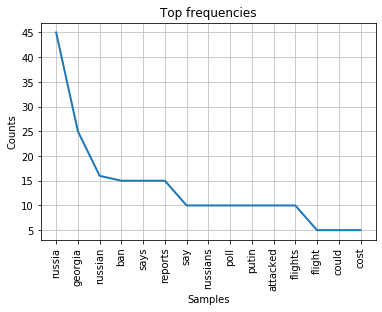

In [9]:
#Results:
top = 15
results = pd.DataFrame(words_except_stop_dist.most_common(top), columns = ["Word", "Frequency"]) # DF Most common 

print("Top", top, "frequencies, excluding stopwords:")
print("-" * 45)
print(results)
print("-" * 45)

words_except_stop_dist.plot(top, title="Top frequencies") #Graph

In [10]:
#results.drop(results[results.Word == "russia"].index, inplace = True)
#results.drop(results[results.Word == "russians"].index, inplace = True)
#results.drop(results[results.Word == "russian"].index, inplace = True)
#results.drop(results[results.Word == "says"].index, inplace = True)

In [11]:
#Word tags: https://www.sketchengine.eu/penn-treebank-tagset/
word_tags = nltk.pos_tag(words_except_stop_dist) #Return list

word_tags = pd.DataFrame(word_tags)

word_tags.head(15)

,0,1
0,russian,JJ
1,flight,NN
2,ban,NN
3,could,MD
4,cost,VB
5,georgia,JJ
6,300m,CD
7,experts,NNS
8,say,VBP
9,nearly,RB


In [16]:
#Result values to STR:
results_STR = [word for word in words if word not in stopwords]
results_STR = ", ".join(results_STR)

results_STR

'russian, flight, ban, could, cost, georgia, 300m, experts, say, nearly, half, russians, oppose, 4day, work, week, poll, says, businessman, yakobashvili, doesnt, plan, return, russia, gallery, searched, putin, extends, ban, eu, food, imports, end, 2020, claims, gun, attack, police, near, chechen, leaders, residence, russia, warns, repeat, cuban, missile, crisis, reports, russians, say, soviet, union, took, care, ordinary, people, poll, kremlin, says, georgia, grip, russophobic, hysteria, russia, counter, new, us, sanctions, iran, reports, evidence, russia, influenced, brexit, via, facebook, social, network, says, russian, opposition, activists, attacked, feces, russia, threatens, economic, pain, standoff, georgia, russian, church, seeks, ban, blessings, weapons, mass, destruction, news, russia, missed, weekend, russian, tv, reporters, attacked, georgia, amid, heightened, tensions, reports, russia, suspend, georgian, flights, russia, starting, july, 8, putin, suspends, passenger, flight

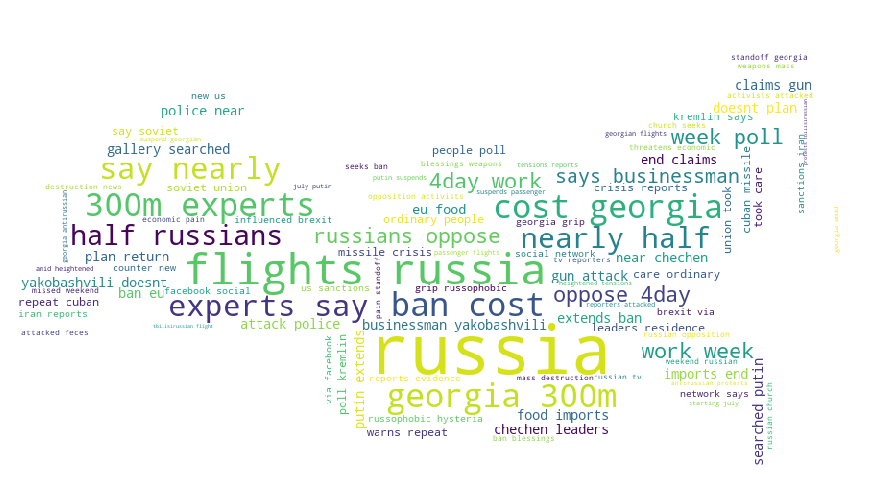

In [64]:
mask = np.array(Image.open(requests.get("https://banner2.kisspng.com/20180703/vlx/kisspng-russian-revolution-blank-map-clip-art-map-russia-5b3c150076f918.4360855015306641924873.jpg", stream = True).raw))

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 1000, height = 1000, background_color = "white", mask = mask).generate(words)
    plt.figure(figsize = (12, 12),facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    
generate_wordcloud(results_STR, mask)